# イジングモデル化

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from blueqat import opt
Opt = opt.Opt

In [14]:
a = 100
b = 1e-2
c = 10


def get_matrix(position, velocity, a=5, b=1e-2):
    # 中心を0に近づけ、負の値を正にする
    e_p = abs(position + 0.5 )
    e_p = 0
    #middle = c * (e_p + a*abs(velocity + b*0))
    middle = 0
    matrix = [-c*(e_p+a*abs(velocity + b * -1)) + middle, -c*(e_p+a *
                         abs(velocity + b * 0)) + middle, middle -c*(e_p+a*abs(velocity + b * 1))]
    return matrix

In [15]:
p = -0.57101507
v = 0.01636341
get_matrix(p,v,a,b)

[-6.363409999999998, -16.36341, -26.36341]

In [16]:
problem = Opt()
problem.add(np.diag(get_matrix(p, v, a, b))).add("1e1*(1 - (q0 + q1 + q2))^2")

In [17]:
problem.qaoa().most_common()

(((0, 1, 1), 0.6649967488316338),)

In [18]:
problem.run()

[0, 1, 1]

In [19]:
problem.qubo

array([[-16.36341,  20.     ,  20.     ],
       [  0.     , -26.36341,  20.     ],
       [  0.     ,   0.     , -36.36341]])

# ここから動かしてみる

In [20]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)
import gym
env = gym.make("MountainCar-v0")
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd

In [21]:
def get_action(action_qaoa):
    for i in range(len(action_qaoa)):
        if action_qaoa[i] == 1:
            return i

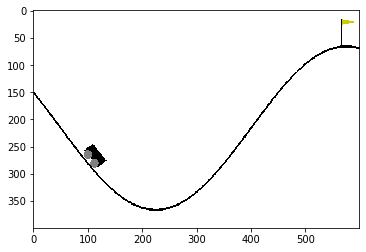

In [22]:
#ゲーム環境のリセット
observation = env.reset()

#画像の準備
fig = plt.figure()
ims = []
actions = []
missed_count = 0

#繰り返し操作して画面を表示
for i in range(200):
    p,v = observation
    
    problem = Opt()
    problem.add(np.diag(get_matrix(p, v, a, b))).add("1e2*(1 - (q0 + q1 + q2))^2")
    
    action_qaoa = problem.qaoa().most_common()[0][0]
    while sum(action_qaoa) != 1:
        missed_count +=1
        action_qaoa = problem.qaoa().most_common()[0][0]
    
    action = get_action(action_qaoa)
    
    actions.append(action)
        
    observation, reward, done, info = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [23]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [24]:
missed_count

1

In [25]:
print(actions)

[1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2]


In [21]:
%%time
# 時間的ネック
for i in range(100):
    action_qaoa = problem.qaoa().most_common()[0][0]
    while sum(action_qaoa) != 1:
        missed_count +=1
        action_qaoa = problem.qaoa().most_common()[0][0]

CPU times: user 19.1 s, sys: 0 ns, total: 19.1 s
Wall time: 19.1 s


In [23]:
%%time
# 時間的ネック
for i in range(100):
    action_qaoa = problem.run()
    while sum(action_qaoa) != 1:
        missed_count +=1
        action_qaoa = problem.run()

CPU times: user 2.5 s, sys: 52.2 ms, total: 2.55 s
Wall time: 2.5 s


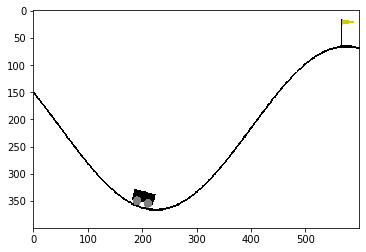

In [39]:
#ゲーム環境のリセット
observation = env.reset()

#画像の準備
fig = plt.figure()
ims = []
actions = []
missed_count = 0

#繰り返し操作して画面を表示
for i in range(200):
    p,v = observation
    
    problem = Opt()
    problem.add(np.diag(([abs(v - b/10),abs(v),abs(v + b/10)]))).add("100*(1 - (q0 + q1 + q2))^2")
    
    action_qaoa = problem.run()
    while sum(action_qaoa) != 1:
        missed_count +=1
        action_qaoa = problem.run()
    
    action = get_action(action_qaoa)
    
    actions.append(action)
        
    observation, reward, done, info = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [40]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [41]:
missed_count

0

In [31]:
missed_count

4918

In [42]:
problem.qubo

array([[-99.98220174, 200.        , 200.        ],
       [  0.        , -99.98120174, 200.        ],
       [  0.        ,   0.        , -99.98020174]])